In [1]:
import folium
import requests
import json
import geopandas as geo
import pandas as pd
import seaborn as sns

In [5]:
set2_colors = sns.color_palette("Set2", 8).as_hex()

print(set2_colors)

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


## PART 1 - Analysing Boroughs and neighborhoods

In [6]:
response = requests.get("https://gitlab.com/drvicsana/cop-proyecto-2023/-/raw/main/nta_shapes.json")
json_response = json.loads(response.text)

In [7]:
data = []
for elem in json_response['features']:
    data.append(elem['properties'])

NTAName = pd.DataFrame(data)

In [8]:
NTAName

,BoroName,NTAName,Shape_Area,nta
0,Queens,St. Albans,7.741275e+07,QN08
1,Bronx,Van Cortlandt Village,2.566612e+07,BX28
2,Queens,South Ozone Park,8.246139e+07,QN55
3,Brooklyn,Canarsie,8.208968e+07,BK50
4,Bronx,Mount Hope,1.471671e+07,BX41
...,...,...,...,...
190,Brooklyn,Starrett City,1.159895e+07,BK93
191,Brooklyn,North Side-South Side,2.885436e+07,BK73
192,Manhattan,Lower East Side,2.330069e+07,MN28
193,Brooklyn,Windsor Terrace,1.404167e+07,BK40


- Manhattan: the nerve center of New York City, where most of the economic activity takes place and where the most luxurious housing is located.

- Brooklyn: The largest borough in population. In recent years it has become home to many families and young professionals due to the more reasonable prices compared to Manhattan and its vibrant artistic, creative and restaurant atmosphere.

- Bronx: One of the most culturally diverse boroughs in the city, with some of the most affordable housing. In the past it has been considered a problematic borough, but the quality of life has been gradually improving. However, it has not yet reached, on a general level, the safety standards of the other boroughs.

- Queens: This is the largest borough in terms of size. It is also less expensive than Manhattan and is it very well connected to it. However, travel times are longer as it is farther away than Brooklyn.

- Staten Island: This borough is sometimes forgotten because it is far from the rest. However, it also belongs to the city of New York. It is also the least populated of all the large boroughs. It concentrates less economic activity than the other boroughs.

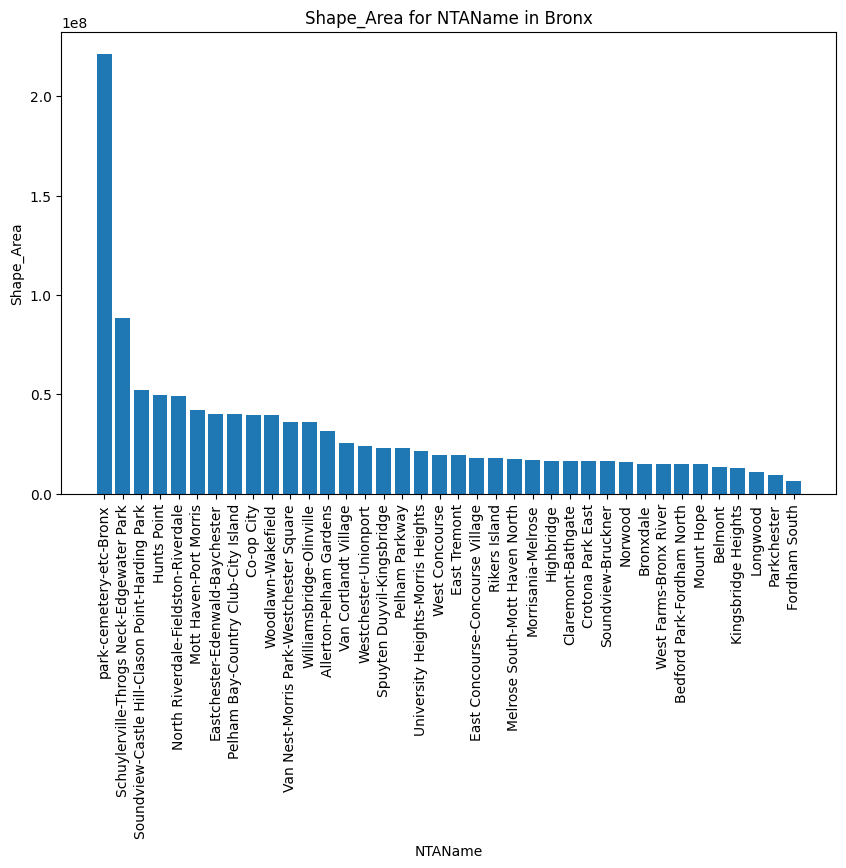

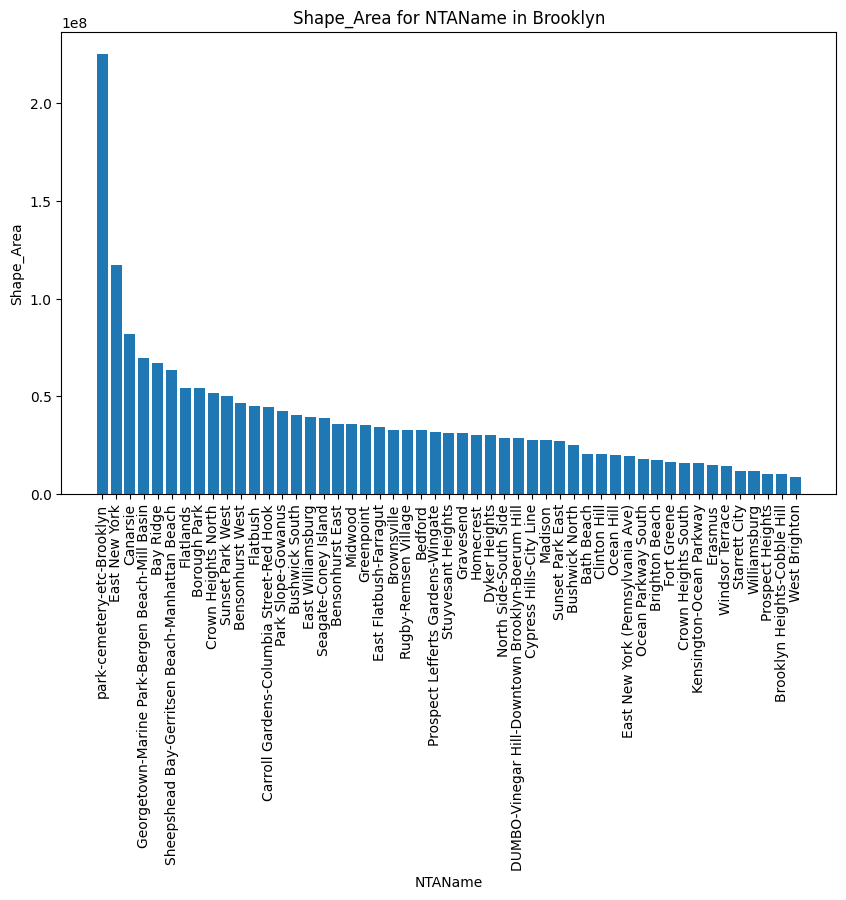

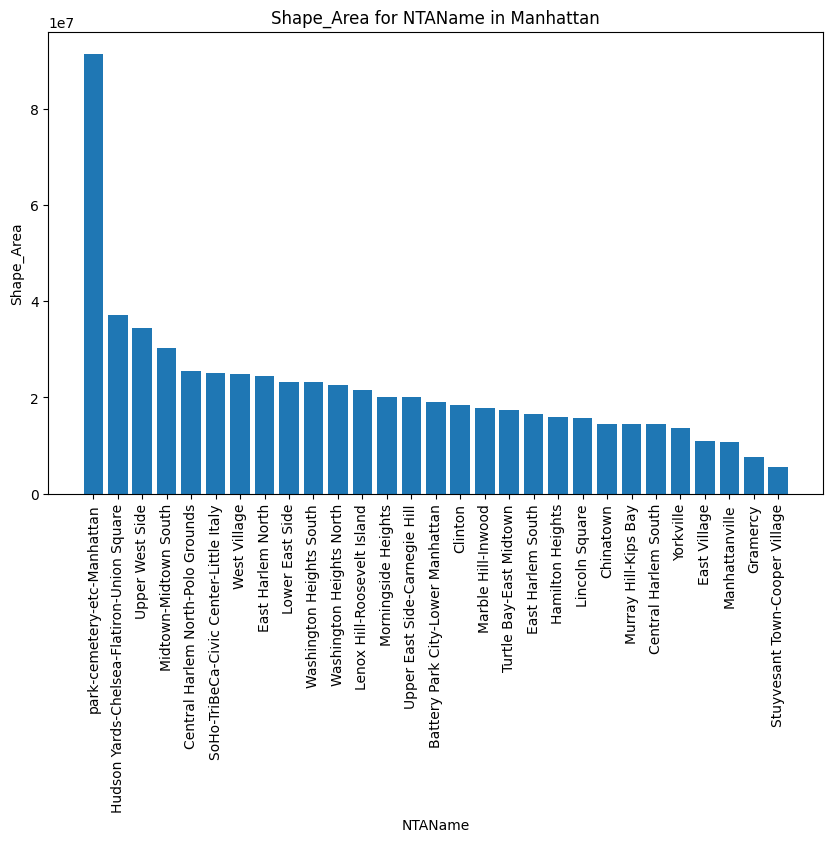

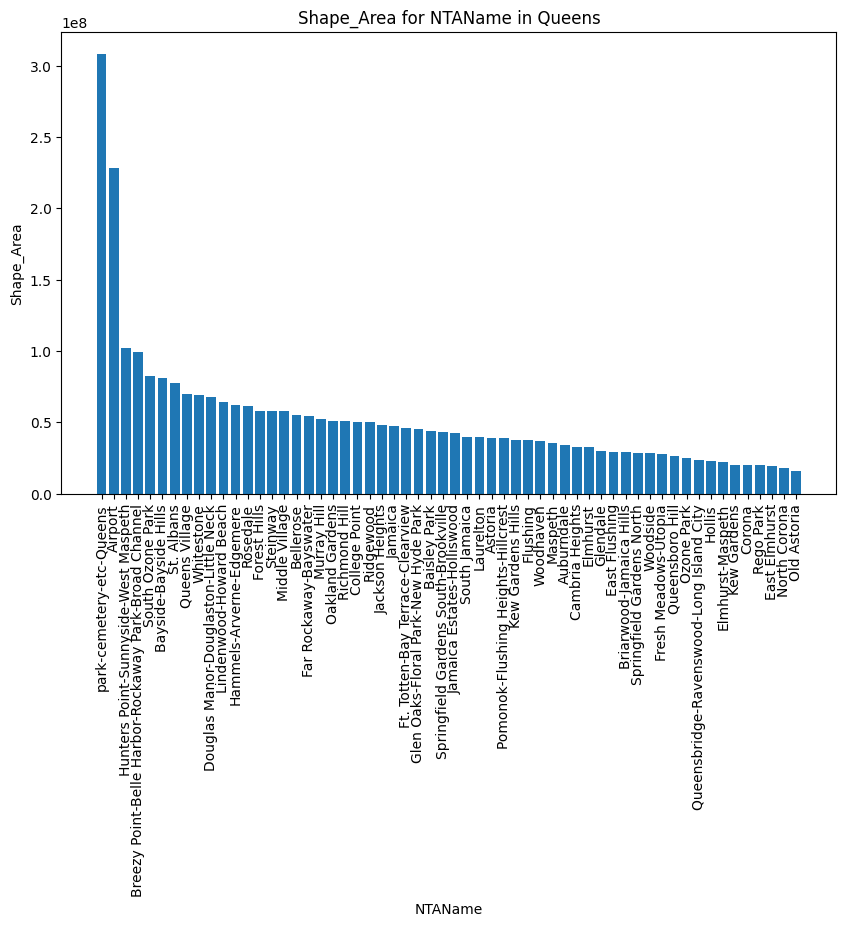

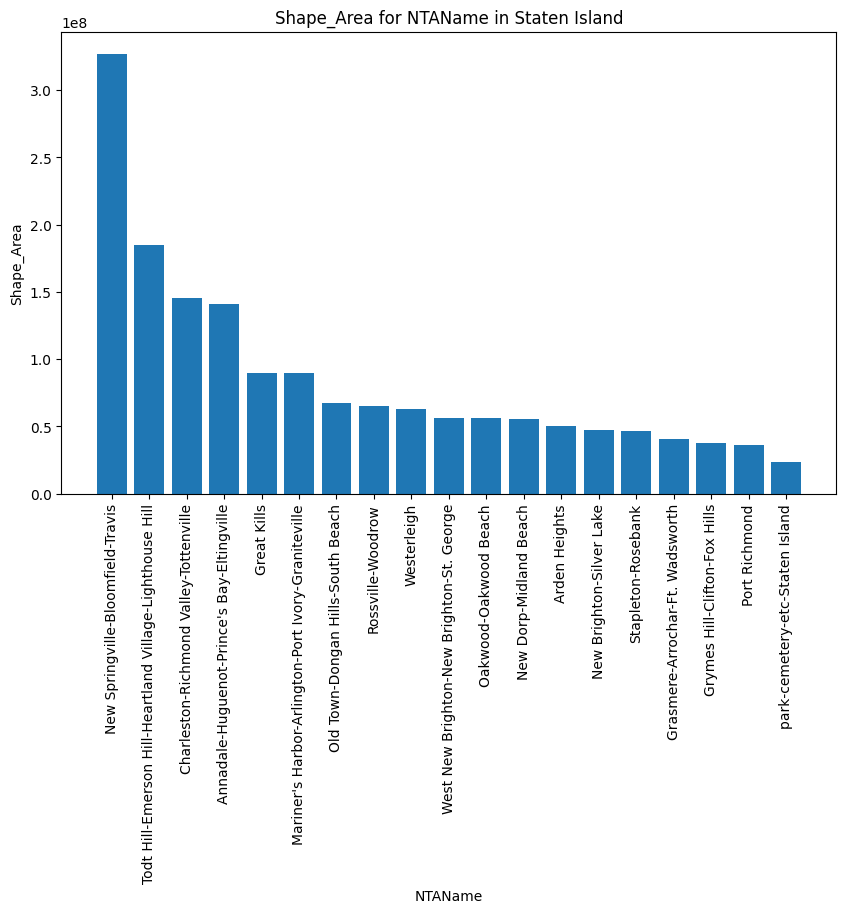

In [9]:
import matplotlib.pyplot as plt

# Group by 'BoroName' and sort by 'Shape_Area' within each group
NTAName2 = NTAName.sort_values(by='Shape_Area', ascending=False).groupby('BoroName')

# Plot a bar plot for each 'BoroName'
for boro, group_df in NTAName2:
    plt.figure(figsize=(10, 6))
    plt.bar(group_df['NTAName'], group_df['Shape_Area'])
    plt.xlabel('NTAName')
    plt.ylabel('Shape_Area')
    plt.title(f'Shape_Area for NTAName in {boro}')
    plt.xticks(rotation=90)
    plt.show()

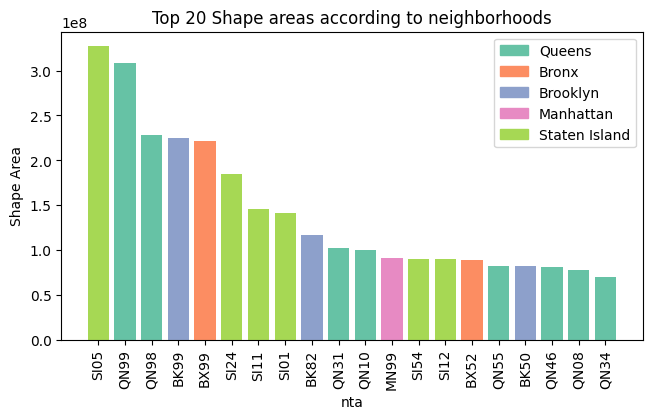

In [24]:
import matplotlib.pyplot as plt

# select top 20 shape_area according to NTAName
top_20_nta = NTAName.nlargest(20, 'Shape_Area')

# Asigna un color único a cada BoroName
boro_colors = {
    'Queens': '#66c2a5',
    'Bronx': '#fc8d62',
    'Brooklyn': '#8da0cb',
    'Manhattan': '#e78ac3',
    'Staten Island': '#a6d854'
}

# Create the barplot
plt.figure(figsize=(7.5, 4))
for index, row in top_20_nta.iterrows():
    plt.bar(row['nta'], row['Shape_Area'], color=boro_colors[row['BoroName']])

# Add labels and title
plt.xlabel('nta')
plt.ylabel('Shape Area')
plt.title('Top 20 Shape areas according to neighborhoods')

# Show the legend 
legend_handles = [plt.Rectangle((0,0),1,1, color=color, label=boro) for boro, color in boro_colors.items()]
plt.legend(handles=legend_handles)

# Rotate the axis
plt.xticks(rotation=90, )
plt.savefig("shape_area_differences.png", format="png")
plt.show()

In [10]:
response = requests.get("https://gitlab.com/drvicsana/cop-proyecto-2023/-/raw/main/project_data/barrios.json")
json_response = json.loads(response.text)

NTAName2 = pd.DataFrame(json_response)
NTAName2 

,boro_name,name,shape_area,nta,population
0,Queens,St. Albans,7.741275e+07,QN08,48593
1,Bronx,Van Cortlandt Village,2.566612e+07,BX28,50100
2,Queens,South Ozone Park,8.246139e+07,QN55,75878
3,Brooklyn,Canarsie,8.208968e+07,BK50,83693
4,Bronx,Mount Hope,1.471671e+07,BX41,51807
...,...,...,...,...,...
190,Brooklyn,Starrett City,1.159895e+07,BK93,13354
191,Brooklyn,North Side-South Side,2.885436e+07,BK73,45774
192,Manhattan,Lower East Side,2.330069e+07,MN28,72957
193,Brooklyn,Windsor Terrace,1.404167e+07,BK40,20988


In [11]:
NTAName2['density'] = NTAName2.population / NTAName2.shape_area *1000

In [12]:
NTAName2

,boro_name,name,shape_area,nta,population,density
0,Queens,St. Albans,7.741275e+07,QN08,48593,0.627713
1,Bronx,Van Cortlandt Village,2.566612e+07,BX28,50100,1.951989
2,Queens,South Ozone Park,8.246139e+07,QN55,75878,0.920164
3,Brooklyn,Canarsie,8.208968e+07,BK50,83693,1.019531
4,Bronx,Mount Hope,1.471671e+07,BX41,51807,3.520284
...,...,...,...,...,...,...
190,Brooklyn,Starrett City,1.159895e+07,BK93,13354,1.151311
191,Brooklyn,North Side-South Side,2.885436e+07,BK73,45774,1.586381
192,Manhattan,Lower East Side,2.330069e+07,MN28,72957,3.131110
193,Brooklyn,Windsor Terrace,1.404167e+07,BK40,20988,1.494694


In [13]:
response2 = requests.get("https://gitlab.com/drvicsana/cop-proyecto-2023/-/raw/main/located_firehouses.json")
json_response2 = json.loads(response2.text)
json_response2

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'FacilityAddress': '42 South Street', 'capacity': 2},
   'geometry': {'type': 'Point', 'coordinates': [-74.007717, 40.703694]}},
  {'id': '1',
   'type': 'Feature',
   'properties': {'FacilityAddress': '49 Beekman Street', 'capacity': 1},
   'geometry': {'type': 'Point', 'coordinates': [-74.005395, 40.709971]}},
  {'id': '2',
   'type': 'Feature',
   'properties': {'FacilityAddress': '100 Duane Street', 'capacity': 4},
   'geometry': {'type': 'Point', 'coordinates': [-74.0063, 40.715339]}},
  {'id': '3',
   'type': 'Feature',
   'properties': {'FacilityAddress': '14 N. Moore Street', 'capacity': 1},
   'geometry': {'type': 'Point', 'coordinates': [-74.00662, 40.719574]}},
  {'id': '4',
   'type': 'Feature',
   'properties': {'FacilityAddress': '75 Canal Street', 'capacity': 2},
   'geometry': {'type': 'Point', 'coordinates': [-73.992834, 40.715408]}},
  {'id': '5',
   'type': 'Feature',
   '

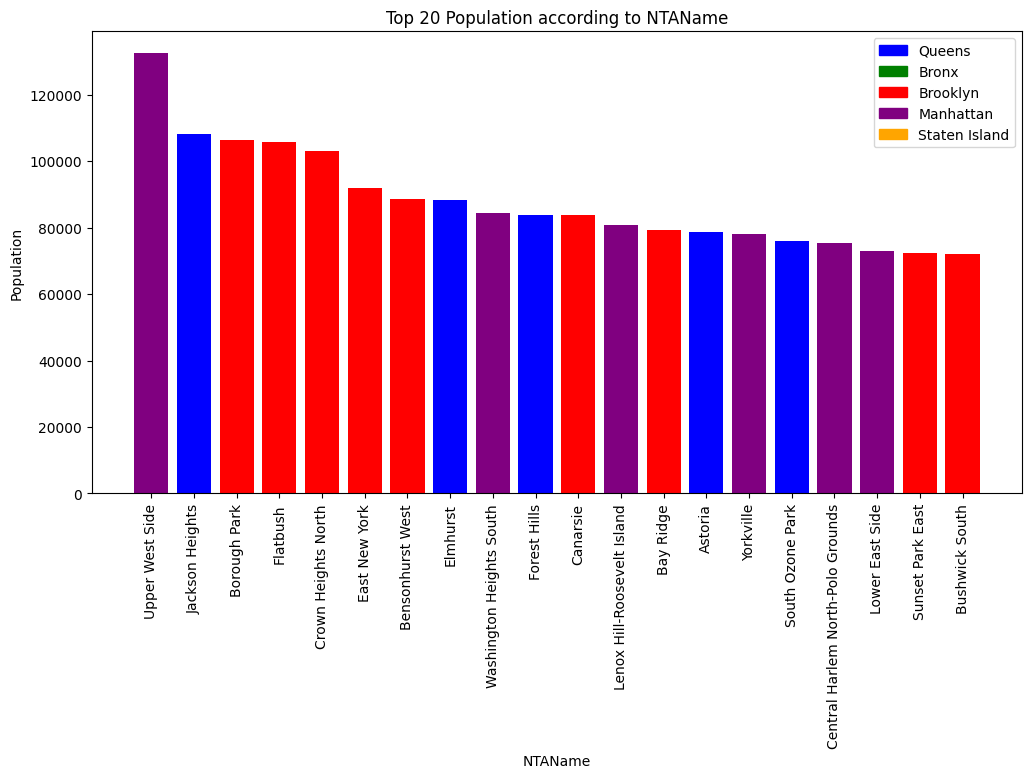

In [14]:
import matplotlib.pyplot as plt

top_20_nta = NTAName2.nlargest(20, 'population')

# 1 colour per each borough
boro_colors = {
    'Queens': 'blue',
    'Bronx': 'green',
    'Brooklyn': 'red',
    'Manhattan': 'purple',
    'Staten Island': 'orange'
}

# create the barplot
plt.figure(figsize=(12, 6))
for index, row in top_20_nta.iterrows():
    plt.bar(row['name'], row['population'], color=boro_colors[row['boro_name']])

# add labels and title
plt.xlabel('NTAName')
plt.ylabel('Population')
plt.title('Top 20 Population according to NTAName')

# show legend with colours
legend_handles = [plt.Rectangle((0,0),1,1, color=color, label=boro) for boro, color in boro_colors.items()]
plt.legend(handles=legend_handles)
plt.xticks(rotation=90)
plt.show()

## PART 2 - Analysing stations

These companies can be located in one of the 218 infrastructures that can serve as parking for firefighters and their vehicles. These infrastructures, which we will call as stations, are distributed throughout the city. The following map shows the distribution of these stations as well as some associated information.

In [15]:
response2 = requests.get("https://gitlab.com/drvicsana/cop-proyecto-2023/-/raw/main/located_firehouses.json")
json_response2 = json.loads(response2.text)

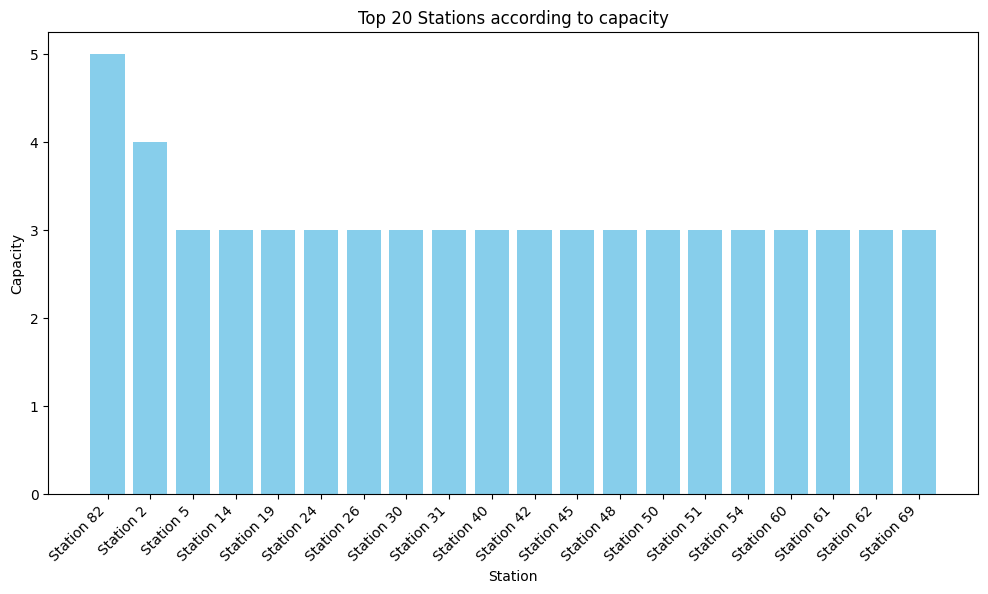

In [16]:
top_20_stations = sorted(json_response2['features'], key=lambda x: x['properties']['capacity'], reverse=True)[:20]

# Obtain top 20 statons according to capacity
capacities = [station['properties']['capacity'] for station in top_20_stations]
station_names = [f'Station {station["id"]}' for station in top_20_stations]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(station_names, capacities, color='skyblue')
plt.xlabel('Station')
plt.ylabel('Capacity')
plt.title('Top 20 Stations according to capacity')
plt.xticks(rotation=45, ha='right')

plt.show()

### PART 2.1: Analysing the distances between stations

In [17]:
response = requests.get("https://gitlab.com/drvicsana/cop-proyecto-2023/-/raw/main/project_data/distancias_estaciones.json")
json_response = json.loads(response.text)
distancesS = pd.DataFrame(json_response)
distancesS

,42 South Street,49 Beekman Street,100 Duane Street,14 N. Moore Street,75 Canal Street,25 Pitt Street,222 East 2 Street,340 East 14 Street,253 Lafayette Street,42 Great Jones Street,...,256 Hylan Blvd.,278 McClean Avenue,1850 Clove Road,1592 Richmond Road,256 Nelson Ave.,345 Annadale Road,1560 Drumgoole Road West,7219 Amboy Road,1100 Rossville Ave,305 Front Street
49 Beekman Street,154.94,NaN,175.70,260.63,261.52,391.57,494.09,549.25,330.31,403.98,...,1401.76,1366.02,1354.62,1570.37,2409.58,2423.84,2609.88,2719.26,2396.89,1584.06
100 Duane Street,299.43,180.79,NaN,96.76,272.78,413.52,467.01,447.83,228.89,302.56,...,1411.62,1375.88,1364.48,1580.22,2419.44,2341.17,2469.12,2578.51,2256.14,1593.91
14 N. Moore Street,408.12,289.48,174.89,NaN,339.69,444.26,450.79,431.61,212.68,286.35,...,1520.31,1484.57,1473.17,1688.91,2405.59,2246.56,2374.51,2483.90,2161.52,1702.60
75 Canal Street,296.75,295.70,275.65,283.51,NaN,195.55,260.18,346.45,260.93,293.16,...,1563.49,1522.61,1516.35,1732.10,2571.31,2470.82,2598.77,2708.16,2385.79,1745.79
25 Pitt Street,392.35,399.36,380.34,348.74,172.41,NaN,169.55,309.45,326.16,350.55,...,1710.42,1669.59,1663.28,1879.03,2695.09,2536.05,2664.00,2773.39,2451.02,1892.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560 Drumgoole Road West,2566.73,2569.97,2455.37,2411.78,2546.66,2647.08,2653.60,2634.43,2415.49,2489.16,...,1494.67,1482.10,1294.59,1056.30,560.66,220.62,NaN,411.10,284.85,1640.12
7219 Amboy Road,2891.38,2772.75,2658.16,2614.56,2749.45,2849.86,2856.39,2837.21,2618.27,2691.95,...,1847.28,1834.71,1647.20,1408.91,898.57,580.71,391.45,NaN,521.33,1992.73
1100 Rossville Ave,2425.57,2306.93,2192.34,2148.75,2283.63,2384.04,2390.57,2371.40,2152.46,2226.13,...,1408.77,1466.73,1208.69,1182.77,763.62,423.58,255.42,486.65,NaN,1554.22
305 Front Street,1587.77,1697.12,1669.21,1686.03,1836.09,1944.04,2015.69,2050.84,1831.90,1905.57,...,275.12,522.31,385.87,609.61,1448.82,1463.08,1753.92,1930.68,1556.88,NaN


## Calculate the Q1 of the distances

In [19]:
half_size = len(distancesS) // 2
half_values = []

for i in range(half_size):
    half_values.extend([distancesS.iloc[i, j] for j in range(i, half_size)])

# Remove NaN values
half_values = [value for value in half_values if not pd.isna(value)]

# Sort the values
half_values.sort()

# Calculate Q1
n = len(half_values)
Q1_position = (n + 1) / 4

if Q1_position.is_integer():
    Q1 = half_values[int(Q1_position) - 1]
else:
    lower_index = int(Q1_position) - 1
    upper_index = int(Q1_position)
    Q1 = (half_values[lower_index] + half_values[upper_index]) / 2

print("First Quartile (Q1) for the upper half of the diagonal matrix:", Q1)

First Quartile (Q1) for the upper half of the diagonal matrix: 687.69


In [127]:
#Select top 20 furthest stations
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
maxValues = distancesS.max()
maxValues = sorted(maxValues)
maxValues = maxValues[-20:]

In [137]:
distances = []

# Iterate over the DataFrame and find the row and column indices of the maxvalues
for i, row in distancesS.iterrows():
    for j, value in row.items():
        if value in maxValues:
            distances.append((i, j, value))       

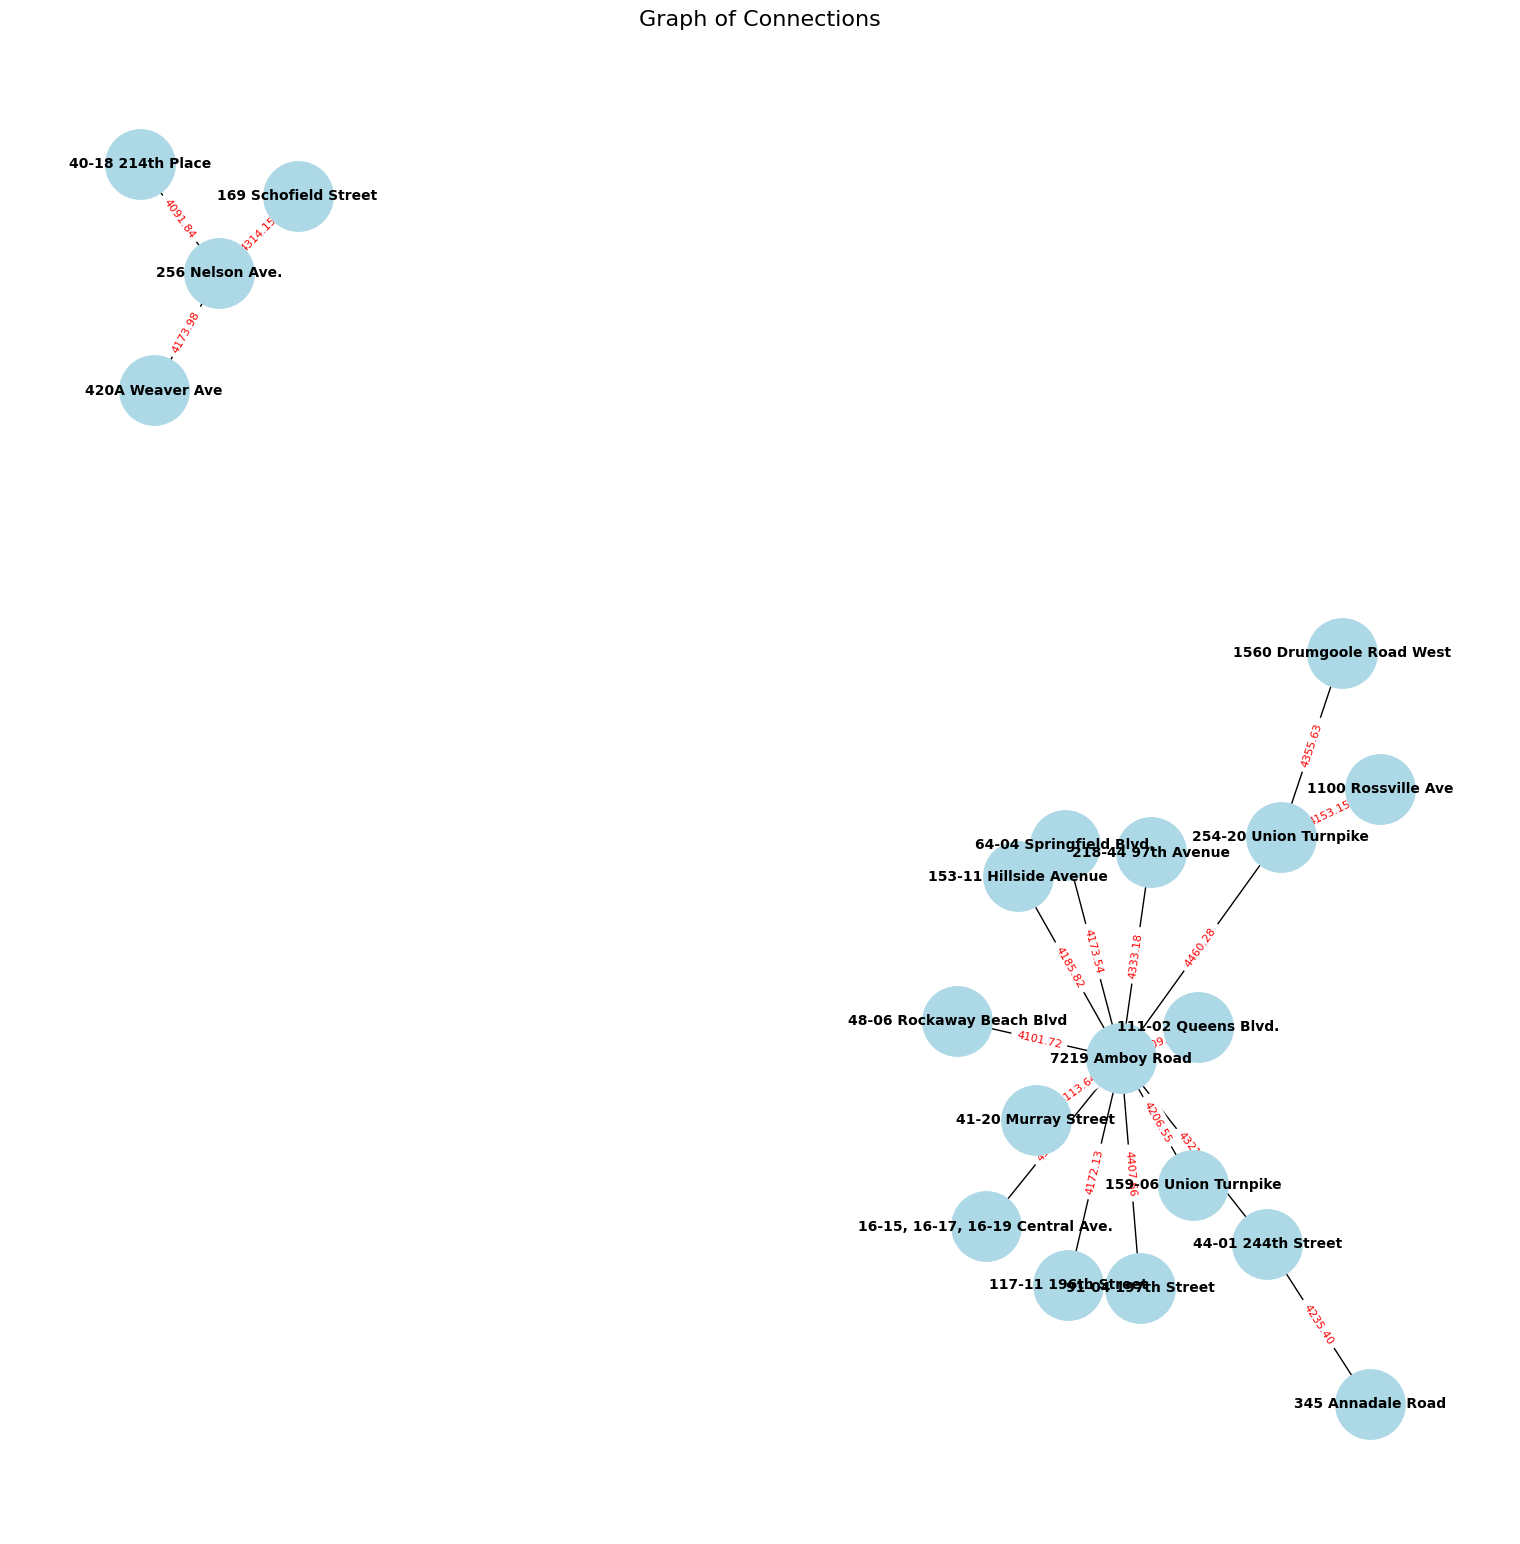

In [155]:
G = nx.Graph()

# Add edges with weights
for edge in distances:
    node1, node2, weight = edge
    G.add_edge(node1, node2, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}

plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="lightblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red', verticalalignment='center', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
plt.title("Graph of Connections", fontsize=16)
plt.show()

### PART 2.2: Analysing the distances between neighbourhhods and stations

The distancias_estaciones_barrios.json file contains information on the distances, in seconds, from each possible station to the centroid of each of the city's neighborhoods. It is a single JSON object that contains all the information. The keys are the source station identifiers. The associated values are new JSON objects containing as a key the neighborhood identifier and as a value the travel time between that origin and destination in seconds.Let's take a look at the first examples of the object:

In [156]:
response = requests.get("https://gitlab.com/drvicsana/cop-proyecto-2023/-/raw/main/project_data/distancias_estaciones_barrios.json")
json_response = json.loads(response.text)
distancesN = pd.DataFrame(json_response)
distancesN

,42 South Street,49 Beekman Street,100 Duane Street,14 N. Moore Street,75 Canal Street,25 Pitt Street,222 East 2 Street,340 East 14 Street,253 Lafayette Street,42 Great Jones Street,...,256 Hylan Blvd.,278 McClean Avenue,1850 Clove Road,1592 Richmond Road,256 Nelson Ave.,345 Annadale Road,1560 Drumgoole Road West,7219 Amboy Road,1100 Rossville Ave,305 Front Street
QN08,2123.18,2130.20,2104.71,2073.11,1896.78,1881.48,1925.06,1876.57,2030.47,1974.10,...,2449.03,2393.86,2396.74,2617.64,3444.35,3471.11,3761.95,3933.27,3559.47,2631.33
BX28,1894.39,1874.63,1935.64,2020.57,1809.95,1751.58,1728.54,1601.29,1843.17,1762.19,...,3168.88,3133.14,3051.15,3274.89,3596.90,3272.39,3250.70,3276.83,3037.71,3351.18
QN55,1872.67,1776.72,1811.35,1821.87,1646.27,1630.97,1674.55,1626.81,1779.96,1724.34,...,2113.36,2058.18,2061.06,2281.96,3108.67,3135.43,3426.27,3597.59,3223.79,2295.65
BK50,1532.61,1587.44,1614.04,1630.87,1548.42,1533.11,1576.70,1662.97,1682.11,1704.08,...,1726.71,1671.54,1674.41,1895.32,2722.02,2748.79,3039.63,3210.95,2837.15,1909.01
BX41,1774.19,1754.43,1815.43,1900.37,1689.74,1631.38,1608.33,1481.08,1722.97,1641.99,...,3048.68,3012.94,2893.91,3117.65,3439.67,3115.16,3093.46,3119.59,2880.48,3201.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BK93,1571.05,1625.88,1652.48,1669.31,1586.86,1571.56,1615.15,1701.41,1720.55,1742.52,...,1753.73,1705.62,1706.59,1922.34,2756.10,2775.81,3066.65,3243.13,2869.33,1936.03
BK73,723.32,730.33,704.84,673.24,496.91,481.61,525.20,611.46,630.60,652.57,...,1791.46,1750.57,1744.32,1960.06,2799.28,2813.53,2988.50,3097.89,2775.52,1973.75
MN28,446.34,463.45,452.35,432.20,240.24,101.92,243.76,387.74,406.88,428.85,...,1774.52,1738.78,1727.38,1943.12,2778.55,2619.51,2747.46,2856.85,2534.48,1956.81
BK40,657.93,767.28,739.37,756.19,906.25,1014.20,1085.85,1121.00,902.06,975.73,...,1058.62,1017.73,1011.48,1227.22,2066.44,2080.69,2371.53,2548.01,2174.21,1240.91


In [157]:
#Select top 20 furthest stations
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
maxValues = distancesN.max()
maxValues = sorted(maxValues)
maxValues = maxValues[-20:]

In [158]:
distances = []

# Iterate over the DataFrame and find the row and column indices of the maxvalues
for i, row in distancesN.iterrows():
    for j, value in row.items():
        if value in maxValues:
            distances.append((i, j, value))       

In [161]:
distances

[('QN44', '1560 Drumgoole Road West', 4410.11),
 ('QN44', '7219 Amboy Road', 4448.06),
 ('QN44', '1100 Rossville Ave', 4207.63),
 ('SI11', '111-36 Merrick Blvd.', 4181.46),
 ('SI11', '117-11 196th Street', 4276.14),
 ('SI11', '145-50 Springfield Blvd.', 4135.61),
 ('SI11', '142-04 Brookville Blvd.', 4159.04),
 ('SI11', '16-15, 16-17, 16-19 Central Ave.', 4404.71),
 ('SI11', '48-06 Rockaway Beach Blvd', 4205.72),
 ('SI99', '3446 Eastchester Road', 4235.5),
 ('SI99', '21 Asch Loop', 4194.14),
 ('SI99', '169 Schofield Street', 4537.84),
 ('SI99', '40-18 214th Place', 4131.24),
 ('SI99', '420A Weaver Ave', 4239.76),
 ('SI01', '44-01 244th Street', 4271.33),
 ('SI01', '254-20 Union Turnpike', 4410.1),
 ('SI01', '91-04 197th Street', 4237.67),
 ('SI01', '218-44 97th Avenue', 4283.0),
 ('QN45', '256 Nelson Ave.', 4221.77),
 ('QN45', '345 Annadale Road', 4248.54)]

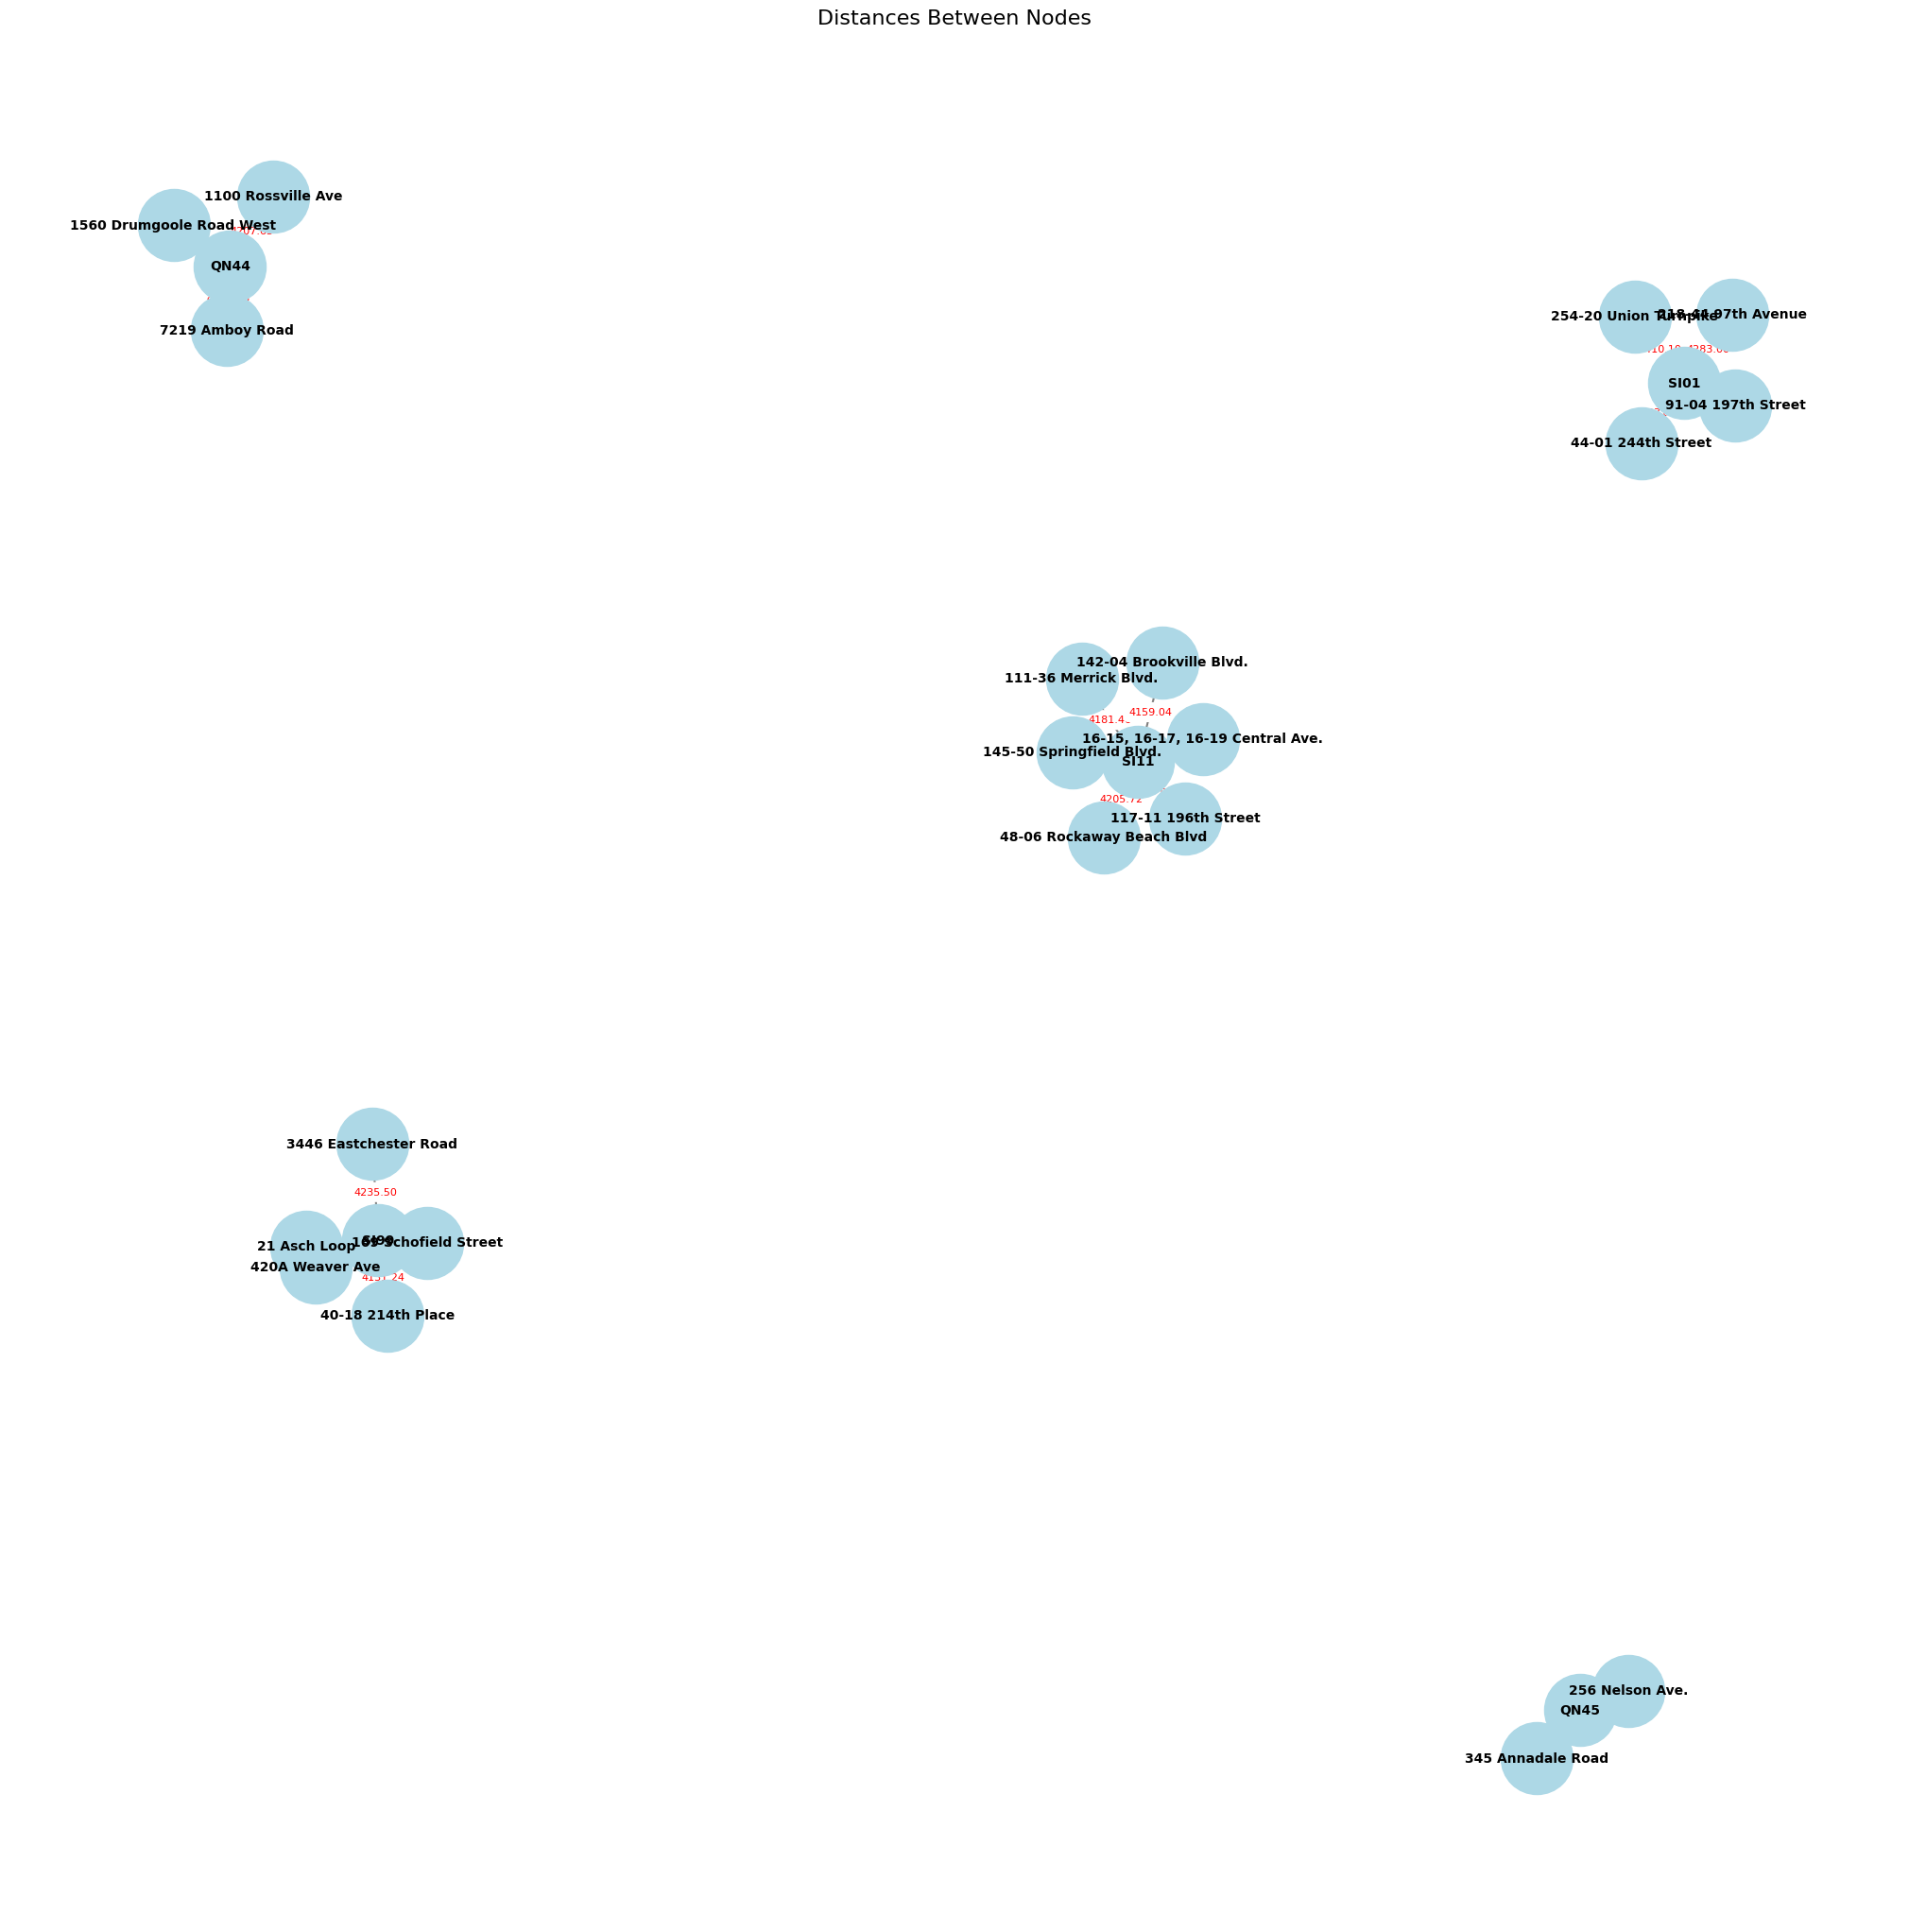

In [166]:
# Create a graph
G = nx.Graph()

# Add edges with weights
for edge in distances:
    node1, node2, weight = edge
    G.add_edge(node1, node2, weight=weight)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}

plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color='gray', width=1.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red', verticalalignment='center', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'), label_pos=0.5, rotate=False)
plt.title("Distances Between Nodes", fontsize=16)
plt.show()

## PART 3 - Analysing incidents

In [169]:
response = requests.get("https://gitlab.com/drvicsana/cop-proyecto-2023/-/raw/main/project_data/incidentes2019.json")
incidents_db = json.loads(response.text)
incidents = pd.DataFrame(incidents_db)
incidents

,nta,units,incident_duration,is_first_shift
0,MN03,[ladder],779.0,True
1,MN23,[engine],1935.0,True
2,BX09,"[ladder, engine, ladder, ladder]",1127.0,False
3,BK43,[ladder],521.0,True
4,MN01,[ladder],364.0,False
...,...,...,...,...
99995,BX49,"[engine, engine]",1299.0,False
99996,MN14,[engine],721.0,False
99997,QN15,[ladder],741.0,False
99998,SI07,"[engine, ladder]",1117.0,True


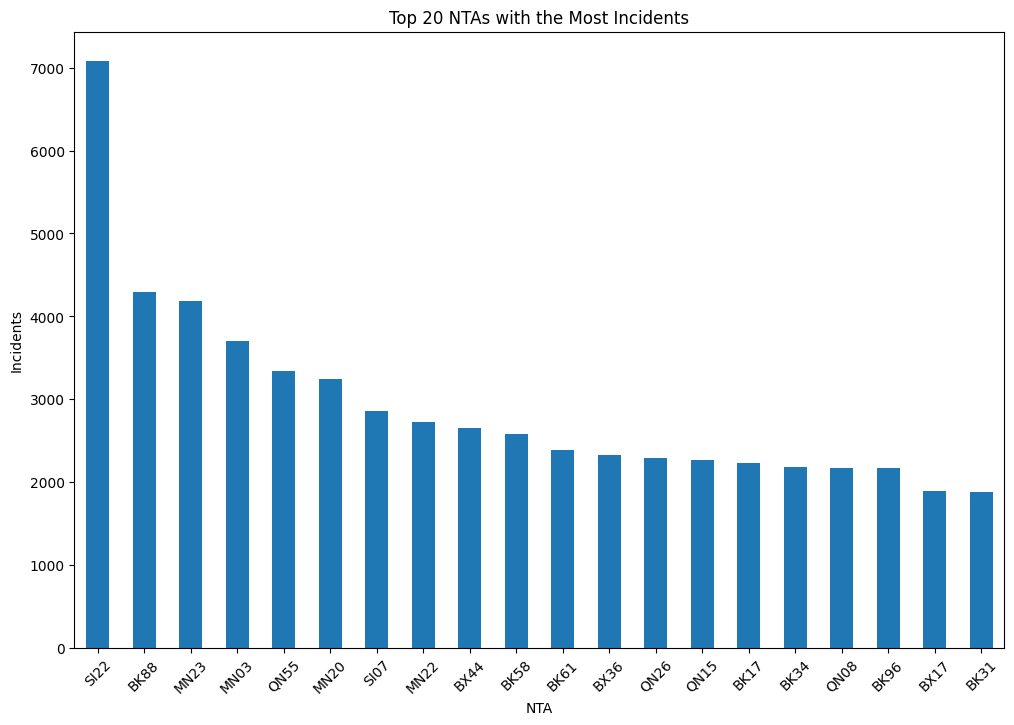

In [172]:
incident_counts = incidents['nta'].value_counts()

# Sort NTAs based on incident counts in descending order and select top 20
top_20_ntas = incident_counts.sort_values(ascending=False).head(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_20_ntas.plot(kind='bar')
plt.xlabel('NTA')
plt.ylabel('Incidents')
plt.title('Top 20 NTAs with the Most Incidents')
plt.xticks(rotation=45)
plt.show()

In [185]:
import matplotlib.pyplot as plt

top_20_incidents = incidents.nlargest(20, 'incident_duration')
top_20_incidents

,nta,units,incident_duration,is_first_shift
63350,SI22,[engine],425735.0,False
81269,QN37,[rescue],351694.0,True
28330,BX36,[ladder],298105.0,True
22805,QN26,"[engine, ladder, ladder, ladder, engine, ladde...",260236.0,True
72978,MN23,"[engine, ladder]",207006.0,True
86084,BK46,"[engine, engine, engine, ladder, ladder, engin...",141801.0,True
43992,SI07,[ladder],95009.0,True
46608,SI22,"[engine, engine, ladder, engine, ladder, engin...",92410.0,True
66861,MN22,"[engine, engine, ladder, engine, engine, ladde...",87005.0,False
64710,QN52,[ladder],86473.0,False
